In [ ]:
pip install easyocr

In [ ]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Crie um dicionário de configurações para o leitor (pode incluir idioma, etc.)
reader_config = {
    'lang_list': ['pt'],
}

In [ ]:
# Função para aprimorar o contraste da imagem
def aprimorar_contraste(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

In [ ]:
# Carregue a imagem que você deseja processar
image_path = '/content/Abrigo_amigo_v2.jpeg'

In [ ]:
# Carregue a imagem usando OpenCV
image = cv2.imread(image_path)

Text(0.5, 1.0, 'Imagem Original')

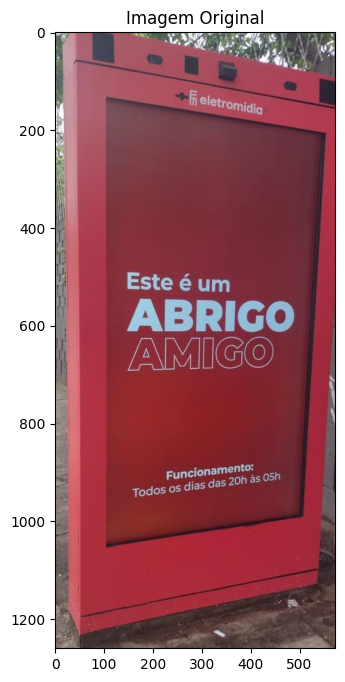

In [ ]:
# Visualize a imagem original
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')

In [ ]:
# Aprimorar o contraste da imagem
image_contrast = aprimorar_contraste(image)

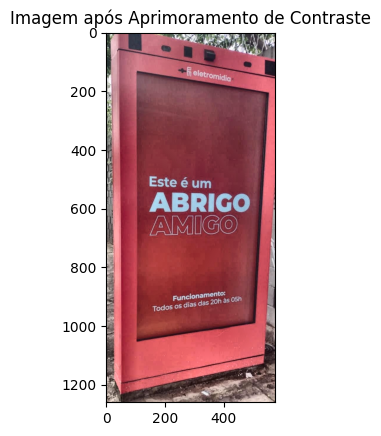

In [ ]:
# Visualize a imagem após o aprimoramento de contraste
plt.subplot(122)
plt.imshow(cv2.cvtColor(image_contrast, cv2.COLOR_BGR2RGB))
plt.title('Imagem após Aprimoramento de Contraste')

plt.show()

In [ ]:
# Crie um objeto Reader
reader = easyocr.Reader(**reader_config)

In [ ]:
# Defina o tamanho do lote (batch_size)
batch_size = 16

In [ ]:
# Processamento em lotes na imagem após o tratamento
results = reader.readtext(image_contrast, batch_size=batch_size)

In [ ]:
# Itere pelos resultados
for (bbox, text, prob) in results:
    print(f'Texto: {text}')

Texto: Este é um
Texto: ABRIGO
Texto: AMIG@
Texto: 'das 2Oh às O5h
Texto: Todos os dias
Texto: 'Feletromidia '
Texto: Funcionamento:
